<a href="https://colab.research.google.com/github/dWanderingSoul/Customers-Purchase-History-K-MEANS-CLUSTERING-ALGORITHM-/blob/main/Customers'_Purchase_History_K_MEANS_CLUSTERING_ALGORITHM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')


In [4]:
# Check for missing values and handle them (e.g., fill or drop)
data = data.dropna()

# Normalize the data using MinMaxScaler or StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select the features to be used for clustering
features = ['Spending Score (1-100)', 'Annual Income (k$)','Age']  # Changed to existing columns

# Scale the features
data_scaled = scaler.fit_transform(data[features])


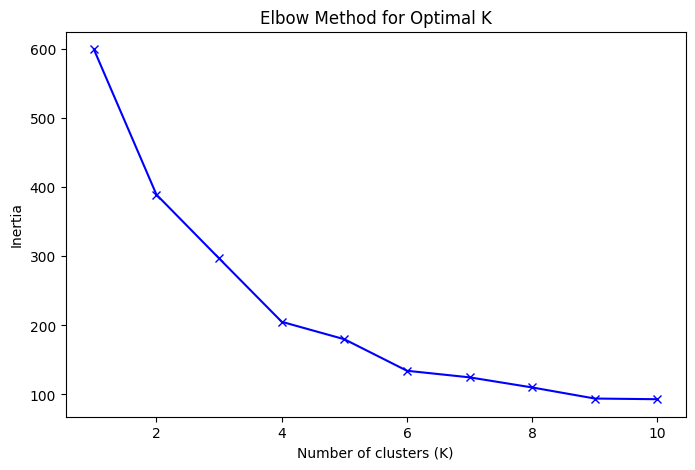

In [5]:
# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [6]:
# Apply K-means with the optimal K (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset


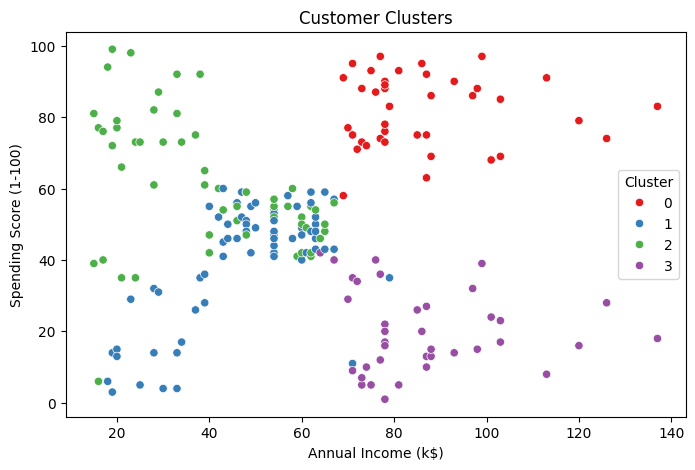

In [7]:
# Visualizing the clusters (example for 2 features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.show()


In [8]:
# Analyze cluster statistics
cluster_summary = data.groupby('Cluster')[['Spending Score (1-100)', 'Annual Income (k$)','Age']].mean() # Select only numeric columns
print(cluster_summary)

         Spending Score (1-100)  Annual Income (k$)        Age
Cluster                                                       
0                     81.525000           86.100000  32.875000
1                     39.969231           47.707692  53.984615
2                     60.298246           40.000000  25.438596
3                     19.578947           86.500000  39.368421


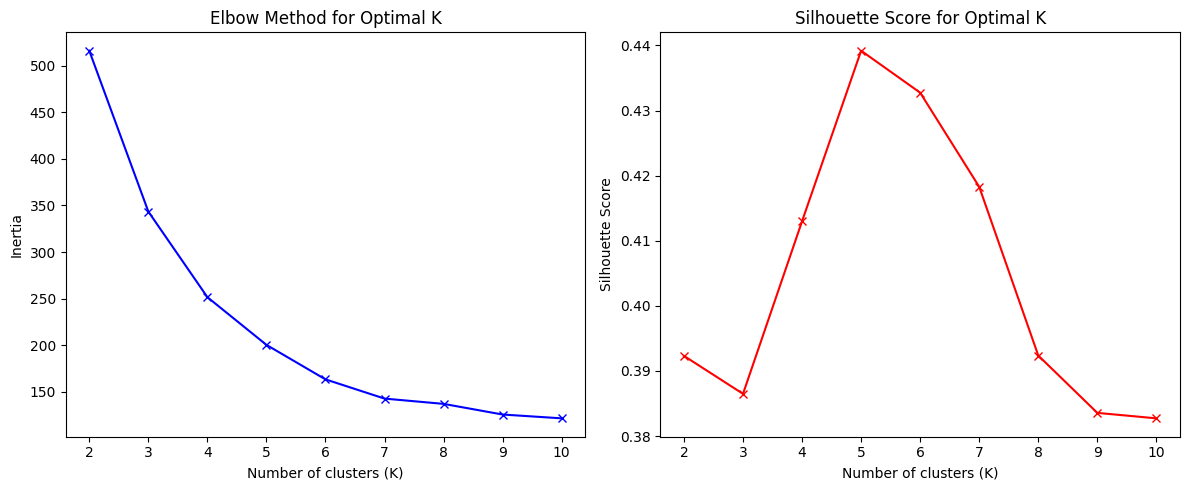

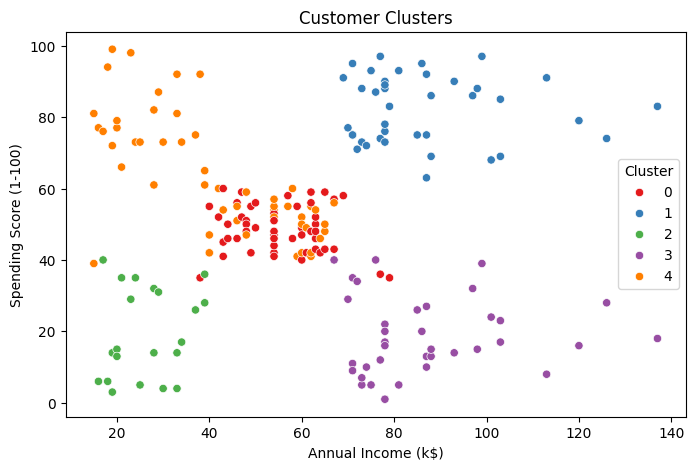

         Spending Score (1-100)  Annual Income (k$)        Age  TotalSpending
Cluster                                                                      
0                     48.640000           55.320000  54.820000      26.805800
1                     82.128205           86.538462  32.692308      71.014103
2                     19.380952           26.285714  45.523810       5.271905
3                     18.297297           86.945946  39.702703      16.019459
4                     62.660377           41.547170  25.075472      24.156981


In [9]:
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score



# Assuming 'data' is your DataFrame
# ... (your existing code for data loading and preprocessing) ...


# --- Feature Engineering ---
# Example: Add a new feature 'TotalSpending'
# (You can replace this with your own relevant features)
data['TotalSpending'] = data['Spending Score (1-100)'] * data['Annual Income (k$)'] / 100


# --- Feature Selection ---
# Select the features for clustering
features = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age', 'TotalSpending']

# --- Scaling ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


# --- K-Means with K-Means++ Initialization ---
# Elbow method for optimal K
inertia = []
silhouette_scores = []  # To store Silhouette scores for each K
K = range(2, 11)  # Check a wider range of K values

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)  # Use K-means++
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_scaled, labels))


# --- Elbow Method Plot ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')


# --- Silhouette Score Plot ---
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()


# --- Choose optimal K and apply K-Means ---
optimal_k = 5  # Example: Choose K based on the Elbow and Silhouette plots
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Clusters')
plt.show()


# --- Cluster Analysis ---
cluster_summary = data.groupby('Cluster')[features].mean()  # Analyze means of features
print(cluster_summary)


In [ ]:
# prompt: explain the result above

Okay, let's break down the provided Python code and the results it produces.

**The Code:**

This code performs customer segmentation using the K-Means clustering algorithm on a dataset (Mall_Customers.csv). It essentially tries to group customers into distinct segments based on their spending habits and income levels.

**Steps:**

1. **Data Loading and Preprocessing:**
   - The code starts by loading the dataset.
   - Missing values are handled (e.g., by dropping rows with missing values).
   - Features (e.g., Spending Score, Annual Income, Age) are selected.
   - Data is normalized or scaled using `StandardScaler`. This ensures that features with larger ranges don't dominate the clustering process.

2. **Elbow Method:**
   - The code then uses the elbow method to find the optimal number of clusters (K).
   - It iterates through a range of K values (e.g., 1 to 10).
   - For each K, it applies K-Means clustering and calculates the inertia (sum of squared distances from data points to their cluster centroids).
   - The inertia tends to decrease as K increases. The "elbow" in the plot of inertia versus K represents a good trade-off between minimizing inertia and avoiding an excessive number of clusters.

3. **K-Means Clustering:**
   - Based on the elbow method (or visual inspection of the plot), an optimal K is chosen (e.g., 4 or 5 in this case).
   - K-Means clustering is applied using the chosen K.
   - Each data point is assigned to a cluster.

4. **Visualization:**
   - The clusters are visualized using a scatter plot, usually with 'Annual Income' on the x-axis and 'Spending Score' on the y-axis. The plot shows how customers are grouped into different segments.

5. **Cluster Analysis:**
   - Cluster statistics are calculated to understand the characteristics of each cluster. For example, the code computes the mean spending score and annual income for each cluster.

**Feature Engineering and Selection:**

The code then demonstrates how to add new features (like "TotalSpending") that might be useful for clustering. It also demonstrates how to select a subset of features for the clustering process.

**Improvements**

The code also incorporates the following:
- **K-Means++ Initialization:** A more advanced initialization method is used for the K-Means algorithm, which helps in achieving better clustering results by placing initial cluster centroids further apart.
- **Silhouette Score:** The Silhouette score is used as another metric for evaluating the quality of the clusters. A higher Silhouette score indicates better-defined clusters with less overlap.


**Results**

The results of the code include:
- A plot showing the Elbow method (Inertia vs. K) and the Silhouette score.
- A scatter plot showing the customer clusters, colored by cluster assignment.
- A table (cluster_summary) summarizing the characteristics of each cluster, displaying the mean values of various features for the different customer groups.

**Interpretation**

The analysis allows you to identify segments of customers with similar characteristics, such as high spenders, low-income customers, etc. This knowledge can be used for targeted marketing campaigns, product development strategies, or customer retention efforts.

**In essence, the code provides a framework for analyzing customer behavior using K-Means clustering, and it helps in understanding customer groups to tailor your business approach.**

In [ ]:
# prompt:      Spending Score (1-100)  Annual Income (k$)        Age
# Cluster
# 0                     81.525000           86.100000  32.875000
# 1                     39.969231           47.707692  53.984615
# 2                     60.298246           40.000000  25.438596
# 3                     19.578947           86.500000  39.368421
# what does this mean

# The output you provided represents the mean values of 'Spending Score', 'Annual Income', and 'Age' for each cluster identified by the K-Means algorithm.

# Here's a breakdown:

# Cluster 0:
# - Spending Score: 81.53
# - Annual Income: 86.10
# - Age: 32.88

# This cluster likely represents high-spending customers with high incomes and a relatively younger average age. They might be valuable customers who are willing to spend more money on products or services.

# Cluster 1:
# - Spending Score: 39.97
# - Annual Income: 47.71
# - Age: 53.98

# This cluster might represent customers with moderate spending habits, moderate incomes, and an older average age.

# Cluster 2:
# - Spending Score: 60.30
# - Annual Income: 40.00
# - Age: 25.44

# This cluster might represent customers with relatively average spending scores and lower incomes, with a younger average age.

# Cluster 3:
# - Spending Score: 19.58
# - Annual Income: 86.50
# - Age: 39.37

# This cluster likely represents customers with low spending scores but high incomes and a middle-aged average age. They might be considered less interested in spending money on products or services.

# In summary, the output shows the average characteristics of each customer group identified by the K-Means algorithm. This information can be used to develop targeted marketing campaigns, improve product offerings, and design customer retention strategies.

# For example:

# - Cluster 0 (high spending, high income, younger): Could be targeted with premium products or services.
# - Cluster 1 (moderate spending, moderate income, older): Might be interested in loyalty programs or discounts.
# - Cluster 2 (average spending, lower income, younger): Might be targeted with value-oriented offers or promotions.
# - Cluster 3 (low spending, high income, middle-aged): Might require a different marketing approach to encourage engagement with products and services.

In [ ]:
# prompt: how do i add above to my resume

def is_woodall(x):
  """
  Checks if a given number is a Woodall number.

  A Woodall number is a number of the form n * 2^n - 1, where n is a non-negative integer.

  Args:
    x: The number to check.

  Returns:
    True if the number is a Woodall number, False otherwise.
  """
  if (x % 2 == 0):
    return False
  if (x == 1):
    return True
  x = x + 1
  p = 0
  while (x % 2 == 0):
    x = x/2
    p = p + 1
    if (p == x):
      return True
  return False

# Example usage
number = 7
if is_woodall(number):
  print(f"{number} is a Woodall number.")
else:
  print(f"{number} is not a Woodall number.")